## Vizualize Faces

Using the DataPrep python file we build random batches, Here we just make sure of if our batches were created properly and we have statified distribution of the labels or not.

In [7]:
import numpy as np
import tensorflow as tf
from data_transformer.data_prep import DataIO

sess = tf.Session()

# VIZUALIZE DISTINCT STRATIFIED BATCHES:

In [8]:
batchFilePath = "/Users/sam/All-Program/App-DataSet/DeepFaceRecognition/data_models/batch_img_arr/"
fileName = 'distinct_stratified_batches.pickle'
batchX, batchY, _ = DataIO.getPickleFile(batchFilePath, fileName)
print(batchX.shape)

/Users/sam/All-Program/App-DataSet/DeepFaceRecognition/data_models/batch_img_arr/distinct_stratified_batches.pickle
(10, 18, 96, 96, 3)


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
def vizualize(imageArray, rows, columns, figsize=(40, 6)):
    fig1, axs = plt.subplots(rows,columns, figsize=figsize, facecolor='y', edgecolor='k')
    if columns>1:
        axs = axs.ravel()
    for no, image in enumerate(imageArray):
        axs[no].imshow(image)

## Random Faces

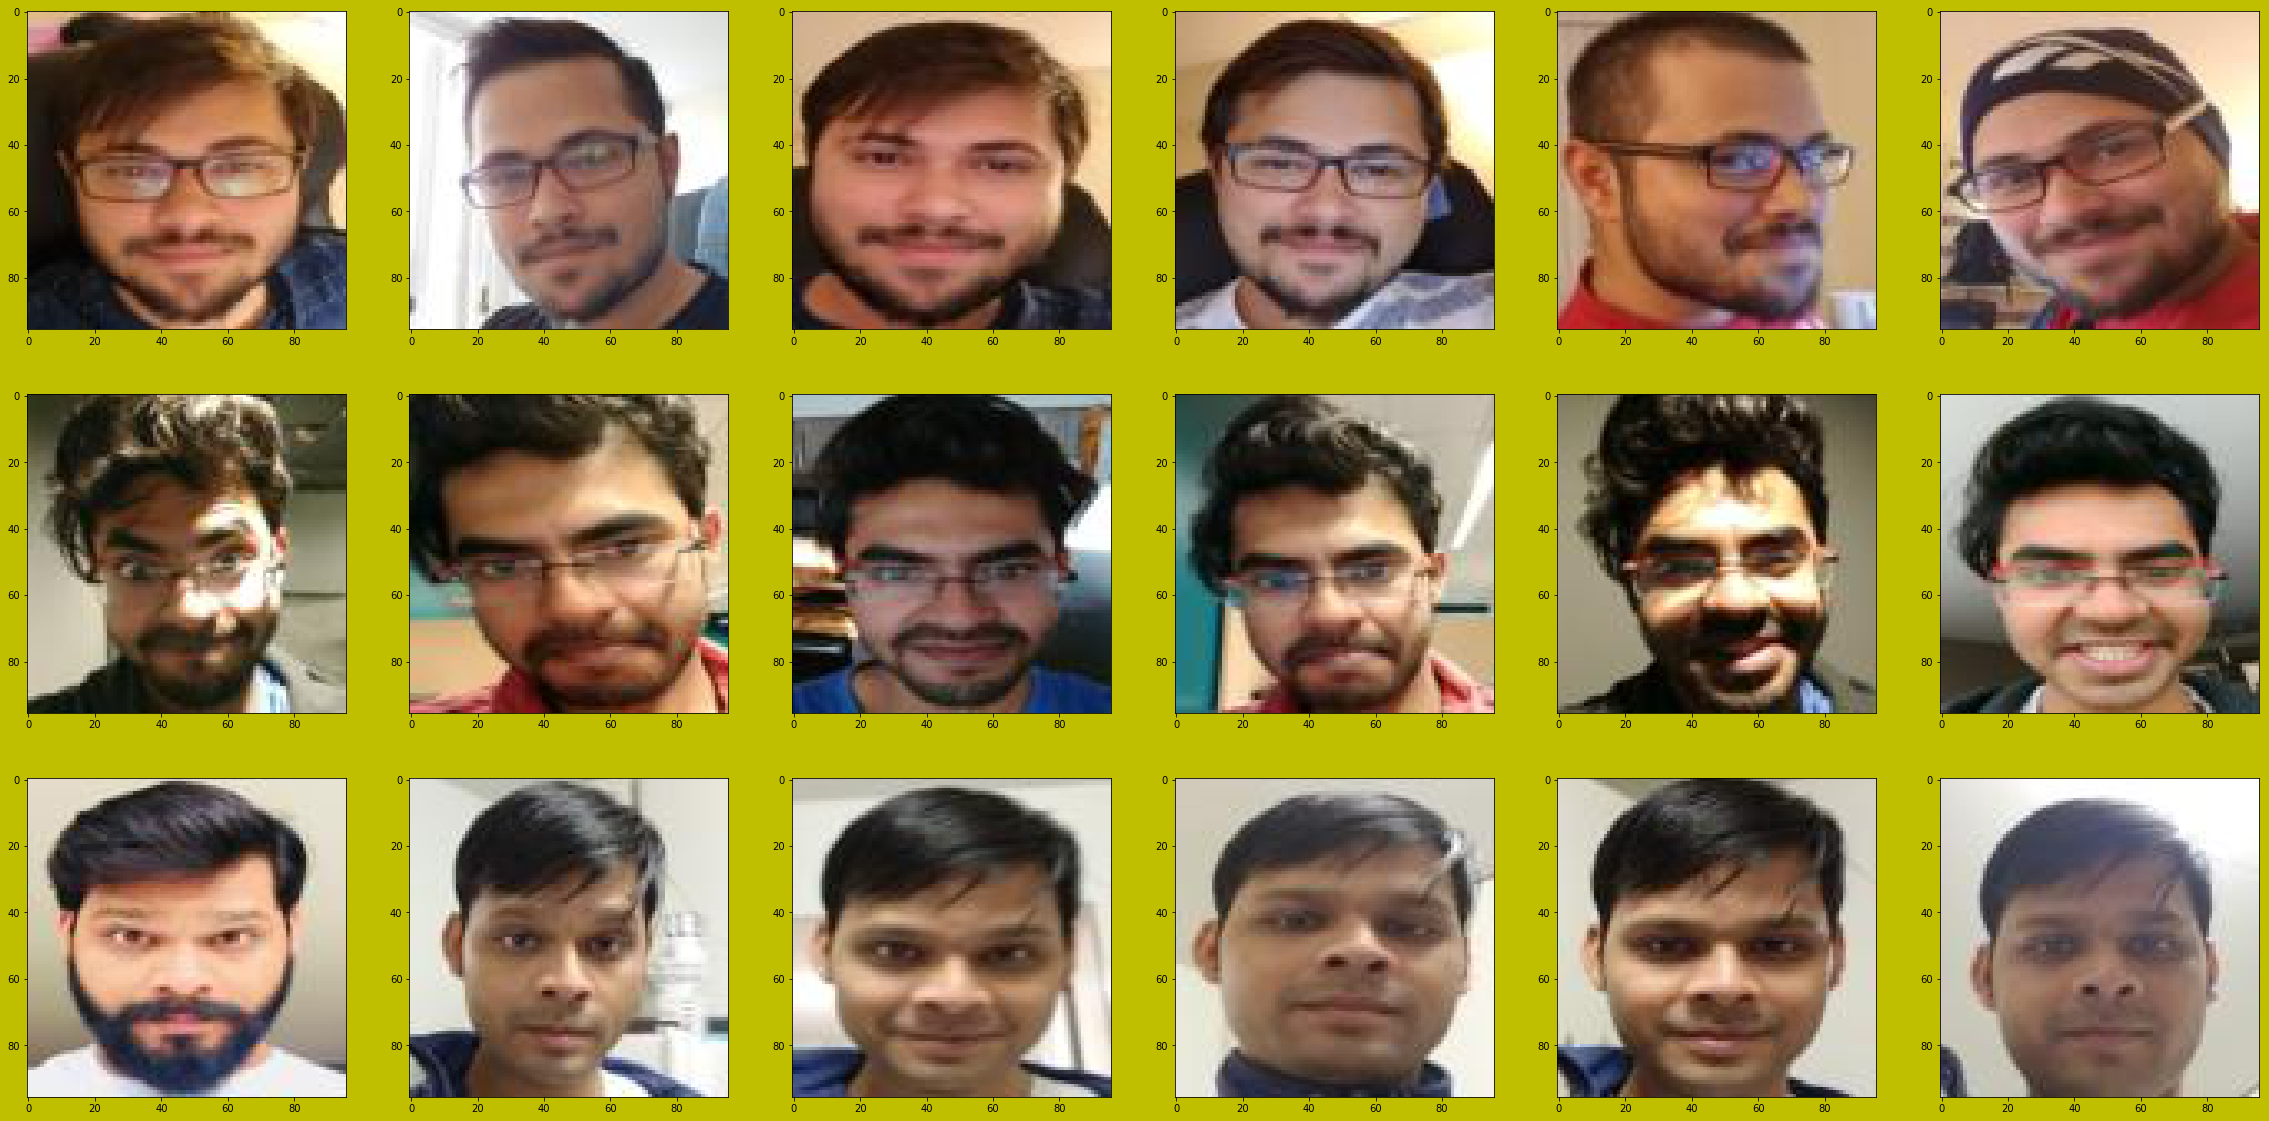

In [10]:
imgArr = batchX[0,:].astype(np.uint8)
vizualize(imgArr, rows=3, columns=6, figsize=(40, 20))

## Grayscale Faces

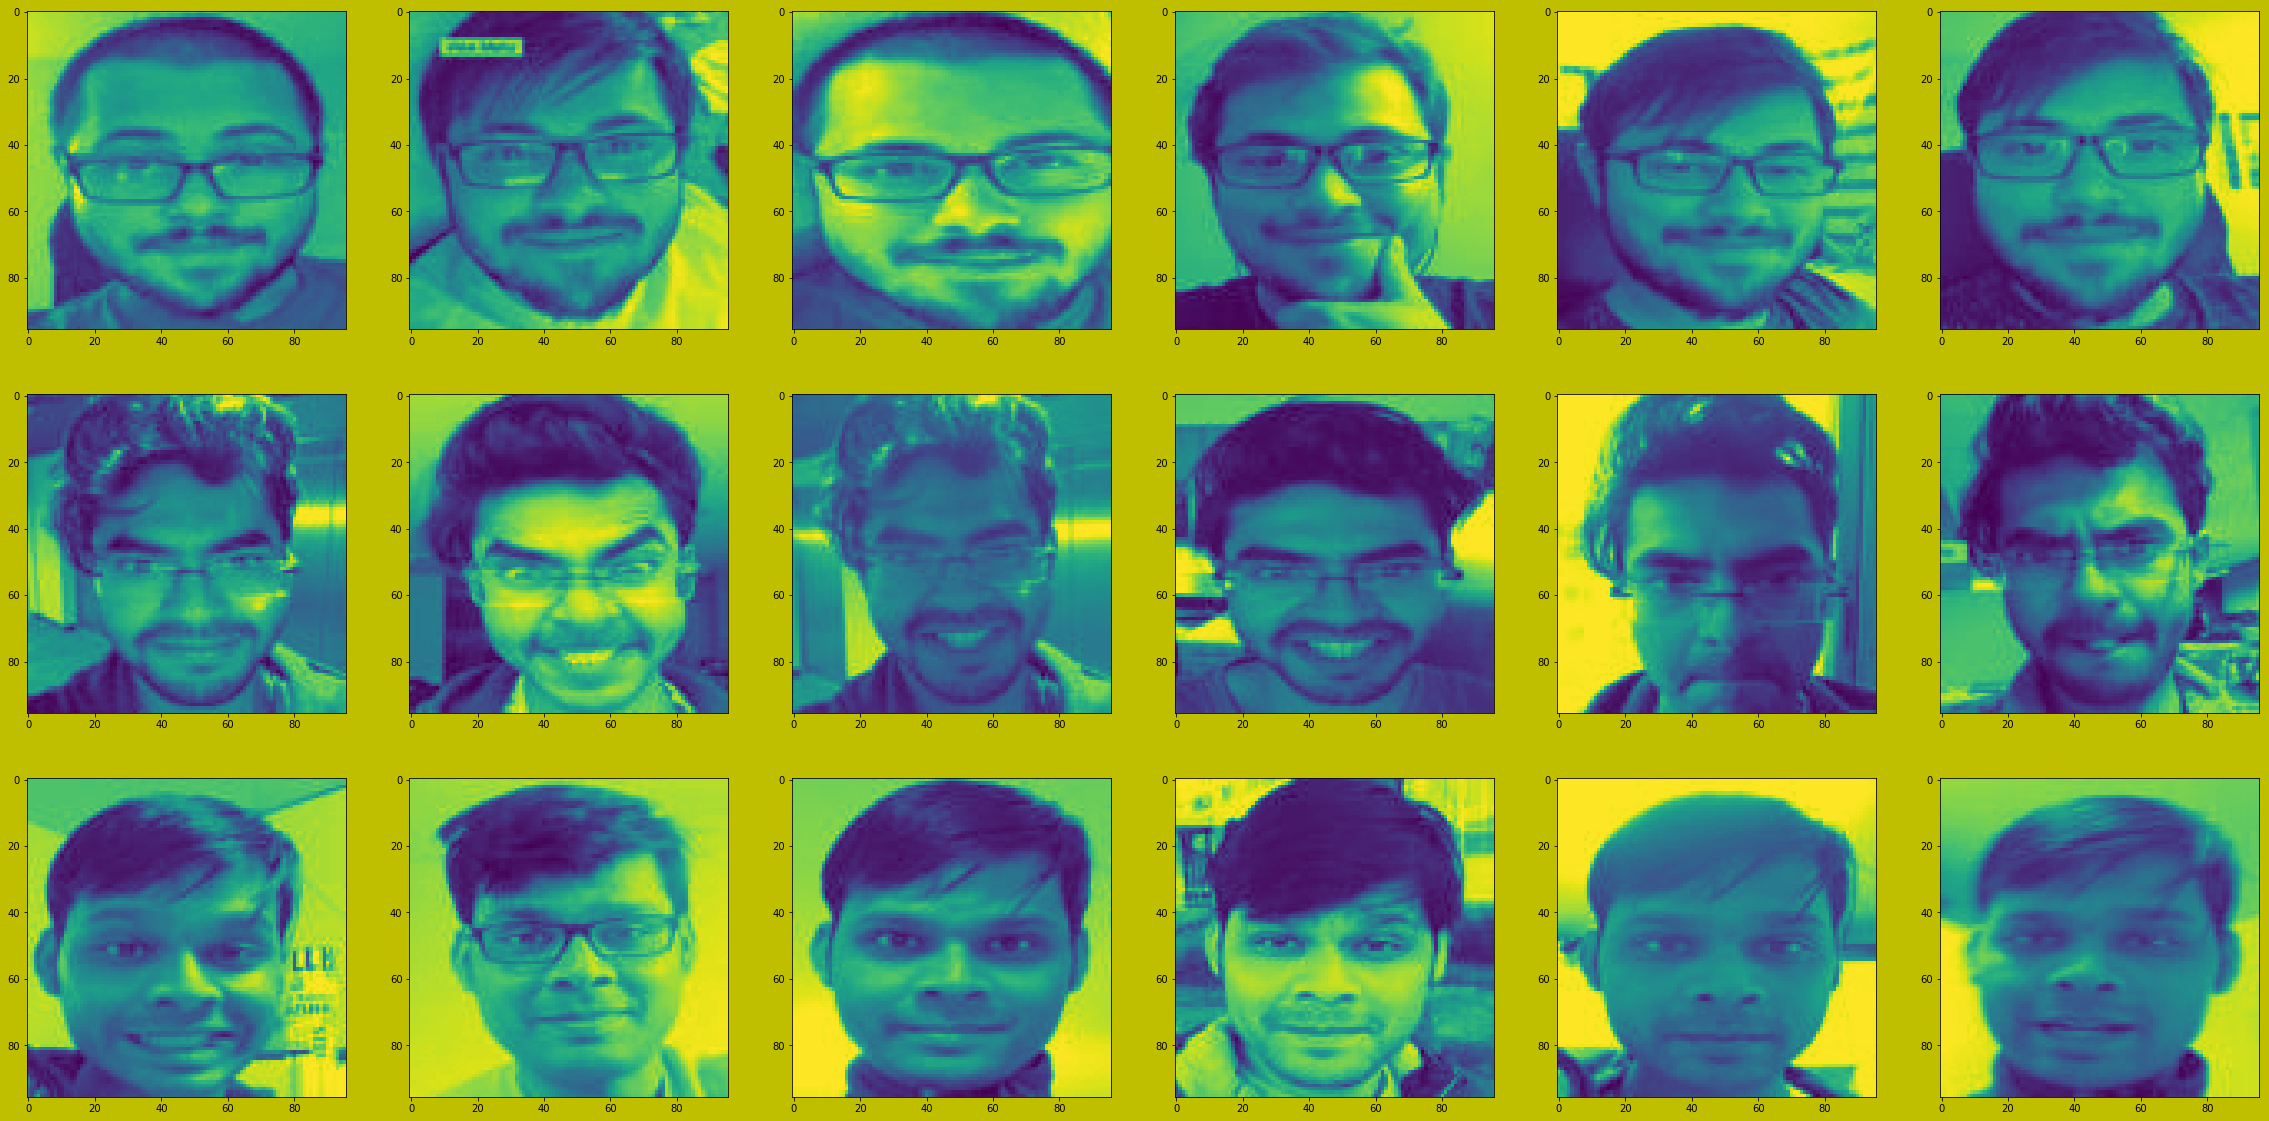

In [11]:
images = np.array([sess.run(tf.image.rgb_to_grayscale(img)) 
                   for img in batchX[1,:]], dtype='uint8')
images = images.reshape(-1,96,96)
vizualize(images, rows=3, columns=6, figsize=(40, 20))

## Random Brightness

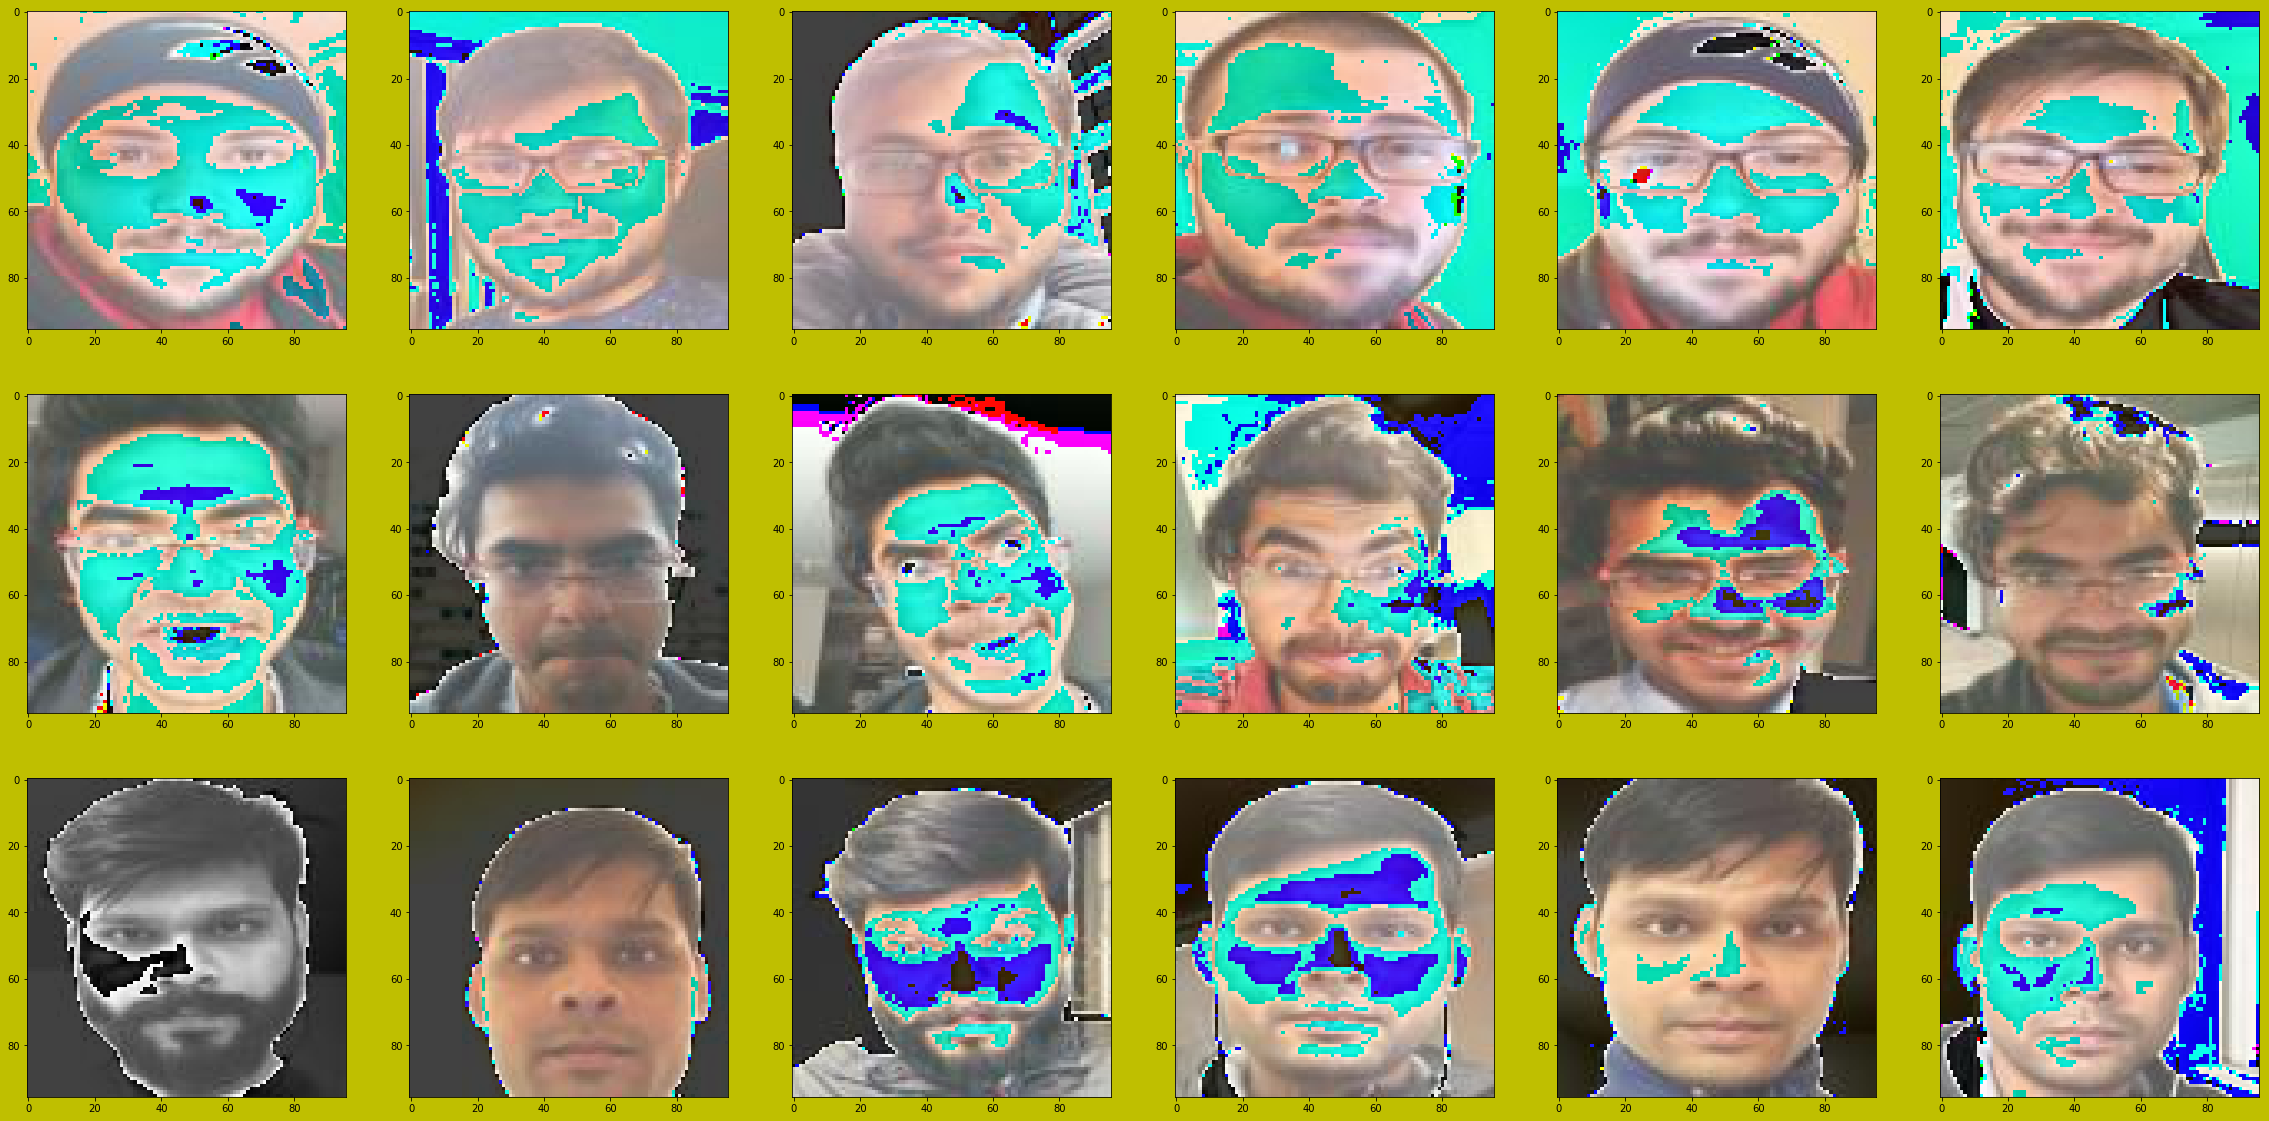

In [12]:
images = np.array([sess.run(tf.image.random_brightness(img, max_delta=70, seed=7591)) 
                   for img in batchX[2,:]], dtype='uint8')
vizualize(images, rows=3, columns=6, figsize=(40, 20))

## Random Constrast

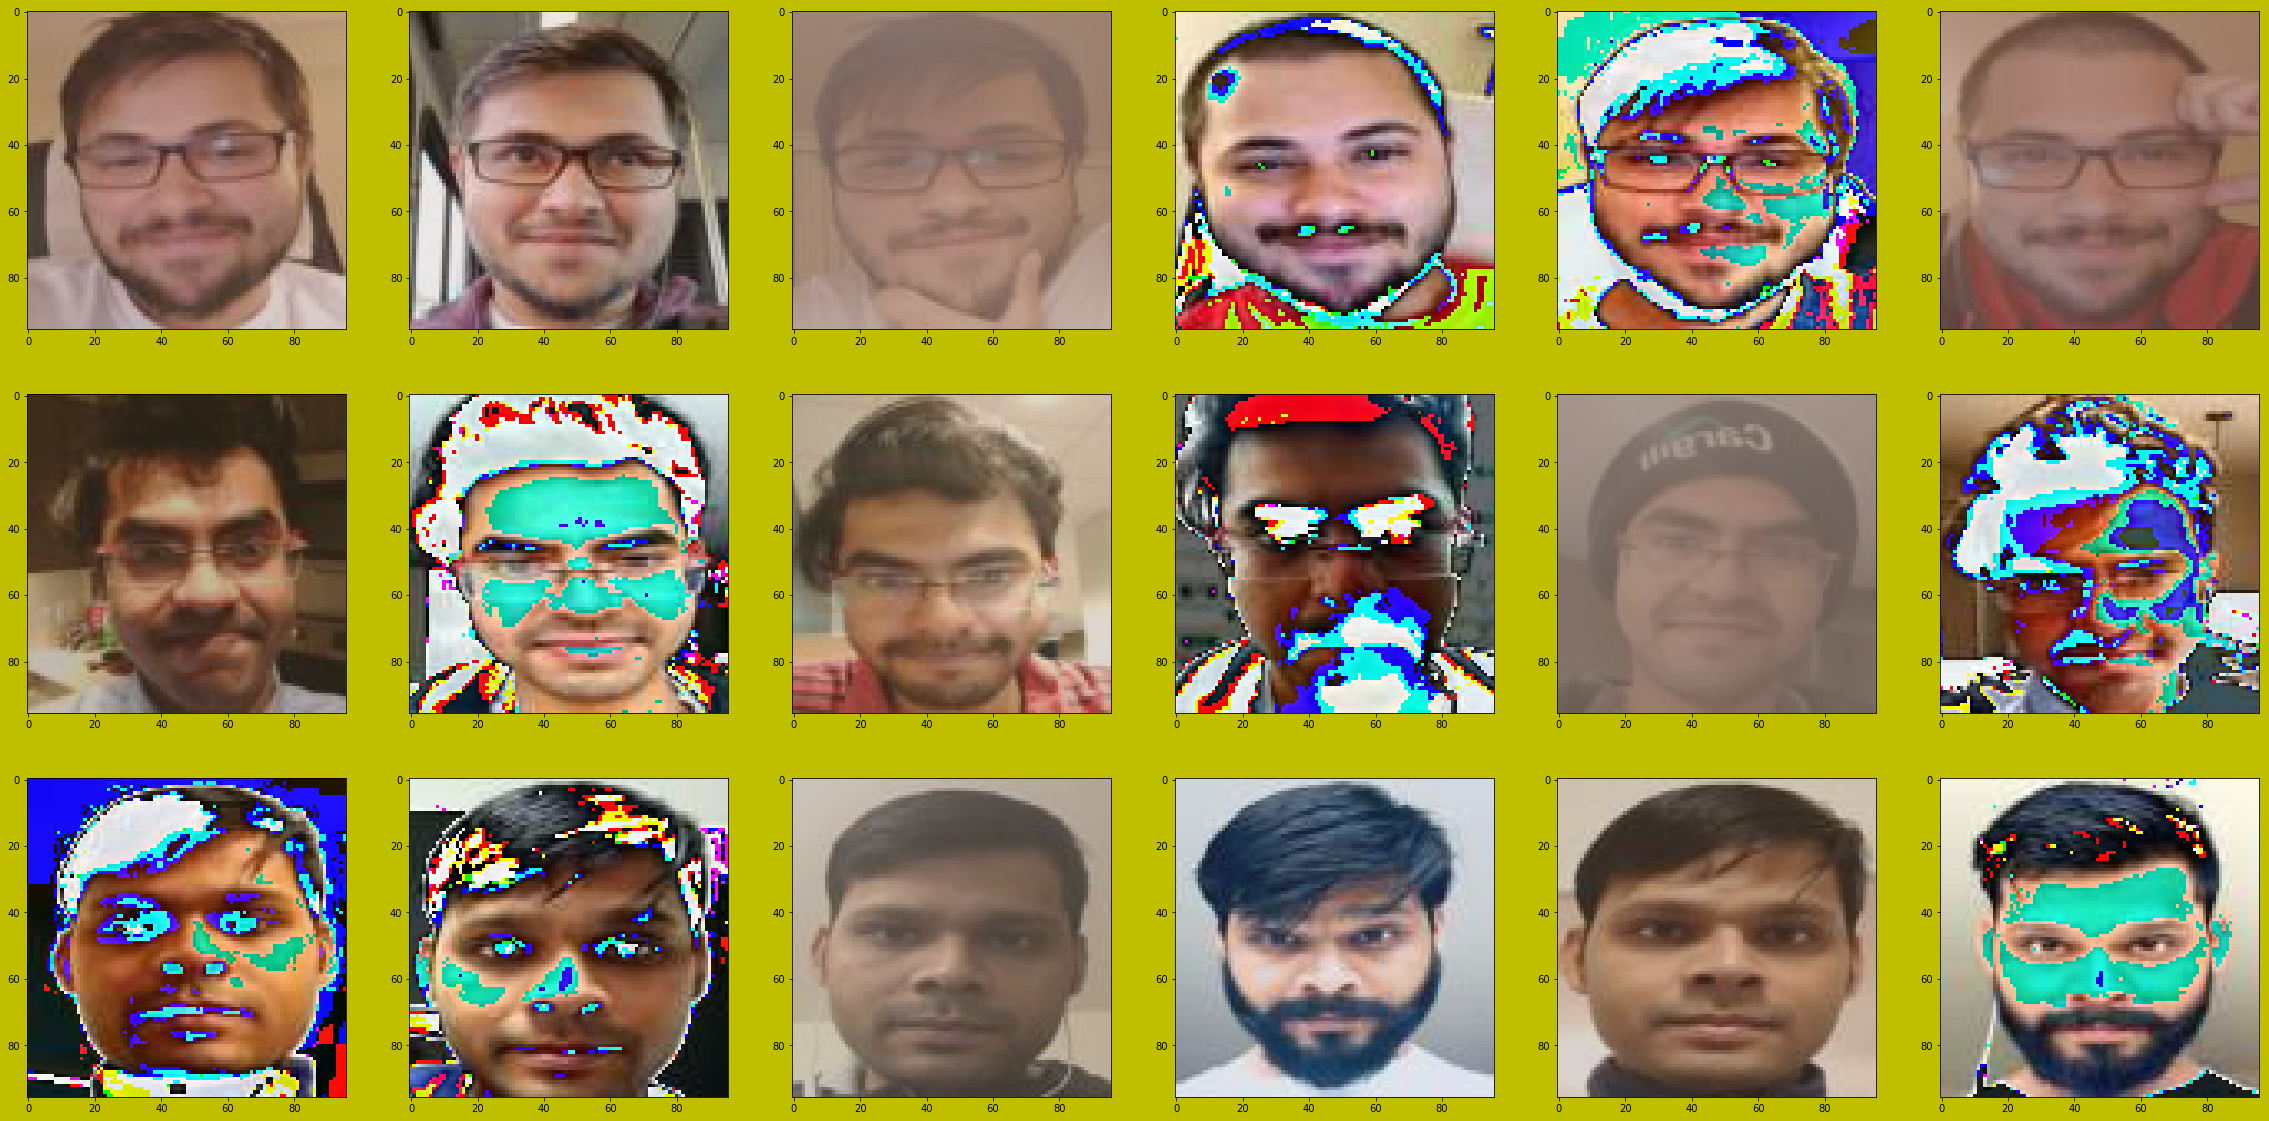

In [13]:
images = np.array([sess.run(tf.image.random_contrast(img, lower=0.2, upper=1.8)) 
                   for img in batchX[3,:]], dtype='uint8')

vizualize(images, rows=3, columns=6, figsize=(40, 20))

## Random Flip

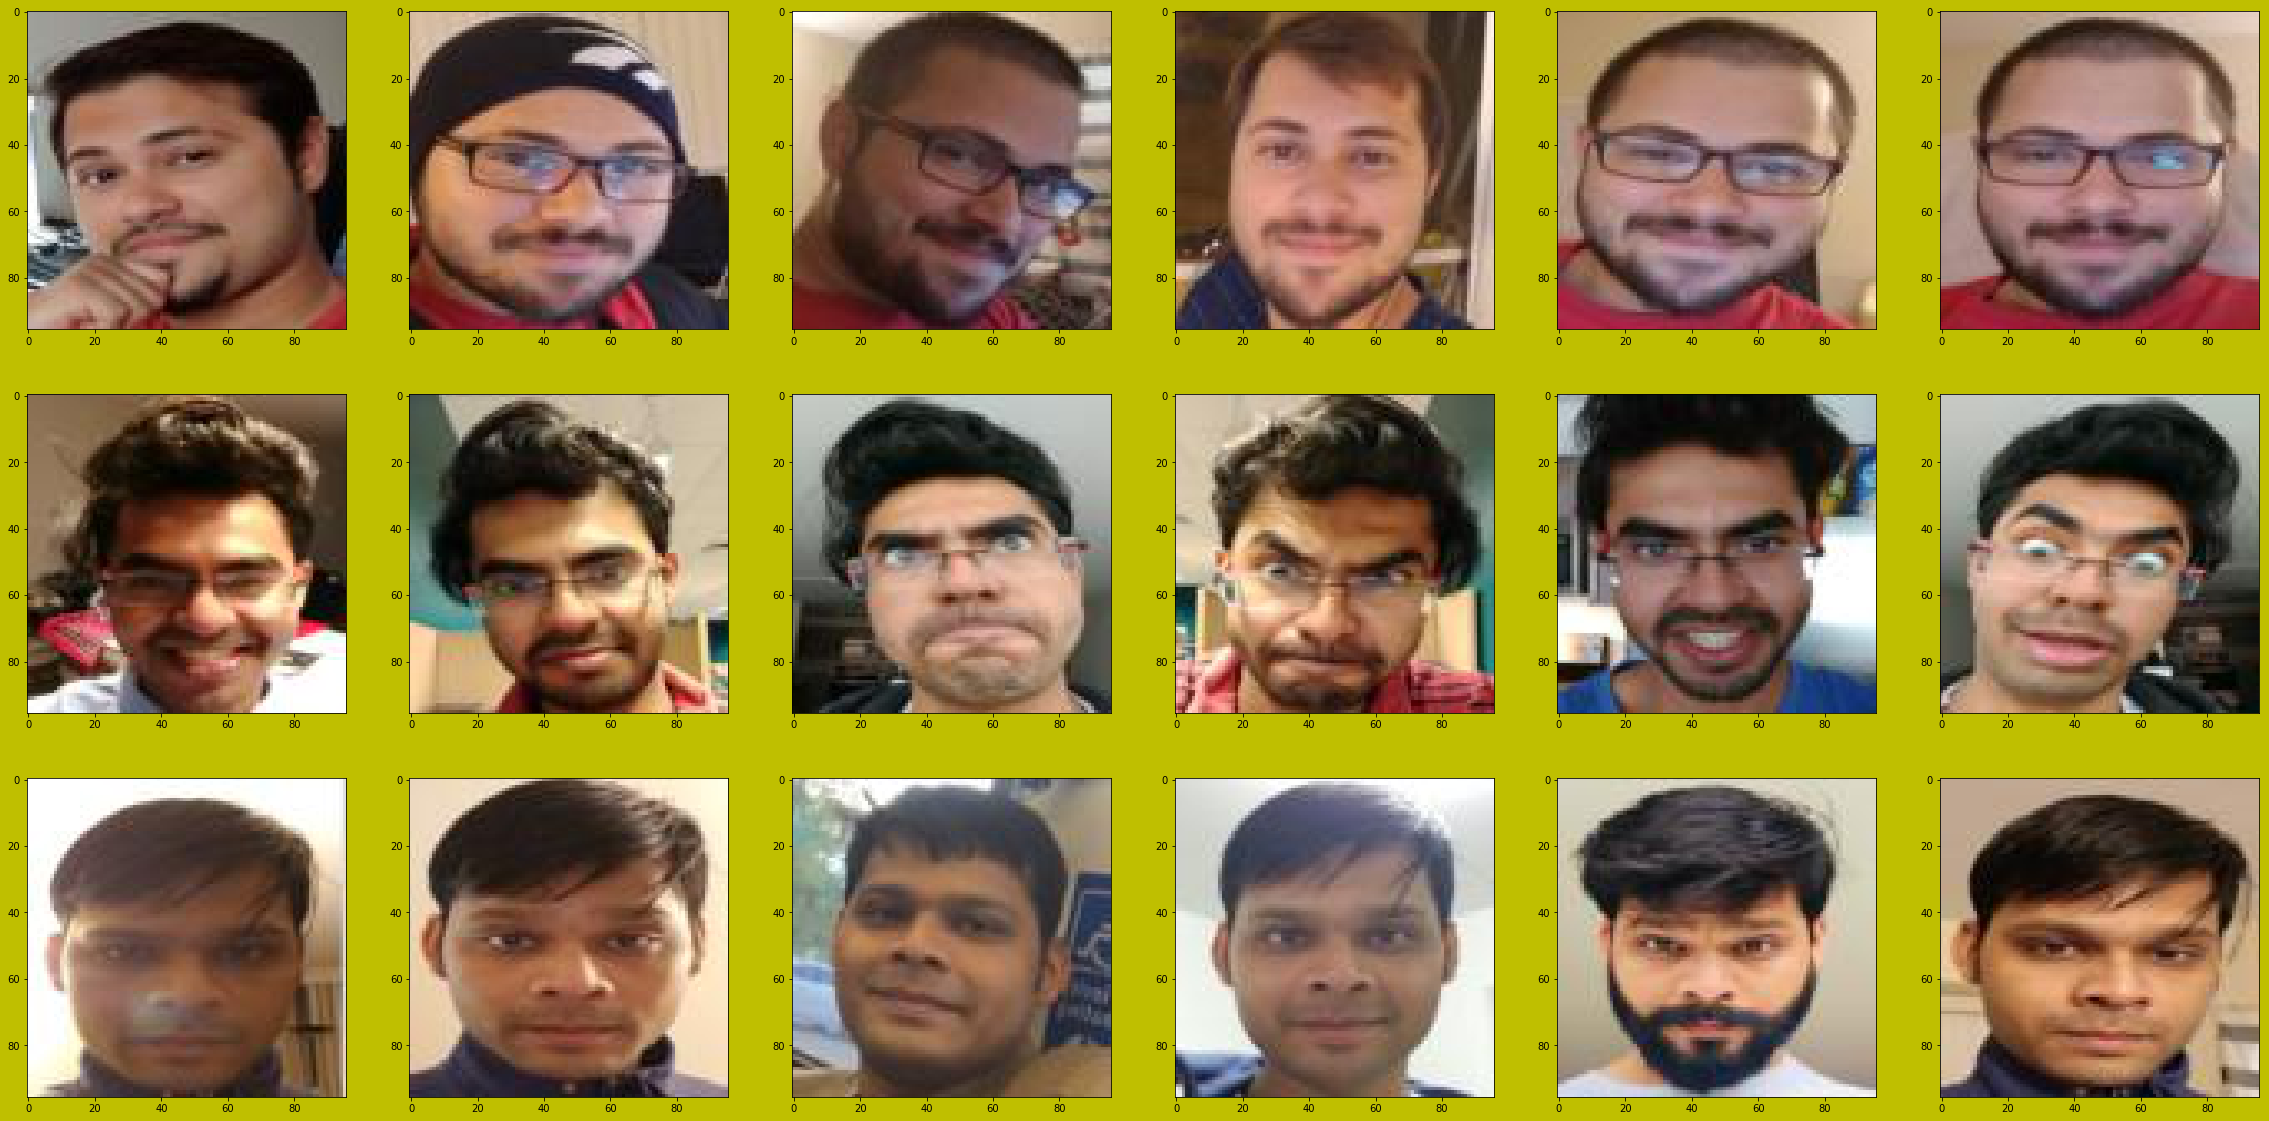

In [14]:
images = np.array([sess.run(tf.image.random_flip_left_right(img)) for img in batchX[4,:]], dtype='uint8')
vizualize(images, rows=3, columns=6, figsize=(40, 20))

In [2]:
import os, sys
import numpy as np
from skimage import transform, io, img_as_uint
from scipy import ndimage, misc
# picPath = '/Users/sam/All-Program/App-DataSet/Deep-Neural-Nets/Models/FaceRecognition/camera_0.jpg'

picPath = "/Users/sam/All-Program/App-DataSet/DeepFaceRecognition/original/"
resizedPath = "/Users/sam/All-Program/App-DataSet/DeepFaceRecognition/resized/"

def readImage(imagePath, resize=96):
    '''
        The input data is is in the shape of [nh, nw, nc], convert it to [nc, nh, nw]
    '''
    image = misc.imread(picPath)
    img = np.around(np.transpose(image, (2,0,1))/255.0, decimals=12) #(2,0,1) = [nc, nh, nw]
    print (image.shape)
    
# def resize(folderPath):
folderPath = picPath
people = [folder for folder in os.listdir(folderPath) if len(folder.split(".")) == 1]

imageOrig = []
imageRshape = []
for name in people:
#     if name != 'jetha':
#         continue
    outPersonPath = os.path.join(resizedPath, name)
    if not os.path.exists(outPersonPath):
        os.makedirs(outPersonPath)
    personPath = os.path.join(folderPath, name)
    imagePathList = [os.path.join(personPath,images) for images in os.listdir(personPath) if images.split(".")[1] == 'jpg']
    for num, imagePath in enumerate(imagePathList):
        print (imagePath)
        image = ndimage.imread(imagePath, mode='RGB')

        imageResized = misc.imresize(image, (96,96))
#         imageList = io.imshow(imageResized)
        io.imsave(os.path.join(outPersonPath, '%s.jpg'%str(num)), img_as_uint(imageResized))
#         io.show()

/Users/sam/All-Program/App-DataSet/DeepFaceRecognition/original/sam/20171006_210052.jpg
/Users/sam/All-Program/App-DataSet/DeepFaceRecognition/original/sam/20171108_082810.jpg


/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


/Users/sam/All-Program/App-DataSet/DeepFaceRecognition/original/sam/20171031_132206.jpg
/Users/sam/All-Program/App-DataSet/DeepFaceRecognition/original/sam/20171110_085420.jpg
/Users/sam/All-Program/App-DataSet/DeepFaceRecognition/original/sam/_20170722_210002.jpg
/Users/sam/All-Program/App-DataSet/DeepFaceRecognition/original/sam/20171016_221120.jpg
/Users/sam/All-Program/App-DataSet/DeepFaceRecognition/original/sam/20170724_091254.jpg
/Users/sam/All-Program/App-DataSet/DeepFaceRecognition/original/sam/20171022_150155.jpg
/Users/sam/All-Program/App-DataSet/DeepFaceRecognition/original/sam/20171110_085350.jpg
/Users/sam/All-Program/App-DataSet/DeepFaceRecognition/original/sam/20171011_190937.jpg
/Users/sam/All-Program/App-DataSet/DeepFaceRecognition/original/sam/20171006_210039.jpg
/Users/sam/All-Program/App-DataSet/DeepFaceRecognition/original/sam/20170801_163155.jpg
/Users/sam/All-Program/App-DataSet/DeepFaceRecognition/original/sam/20170916_230828.jpg
/Users/sam/All-Program/App-Data

In [ ]:
import tensorflow as tf
with sess.as_default():
    imgPath = "/Users/sam/All-Program/App-DataSet/DeepFaceRecognition/original/sam/20171006_210052.jpg"
    fileQueue = tf.train.string_input_producer(tf.train.match_filenames_once(imgPath))
    image_reader = tf.WholeFileReader()
    _, image_file = image_reader.read(fileQueue)
    image =  tf.image.decode_jpeg(image_file)
    print (image.eval())

In [ ]:
resizedImagePath = "/Users/sam/All-Program/App-DataSet/DeepFaceRecognition/resized/"

for 